C:\Users\alisa\.cache\templateflow\tpl-MNI152NLin2009cAsym\tpl-MNI152NLin2009cAsym_res-01_atlas-HOCPA_desc-th0_dseg.nii.gz
[[   1.    0.   -0.  -96.]
 [   0.    1.   -0. -132.]
 [   0.    0.    1.  -78.]
 [   0.    0.    0.    1.]]
Orientation (in RAS+ format): ('R', 'A', 'S')


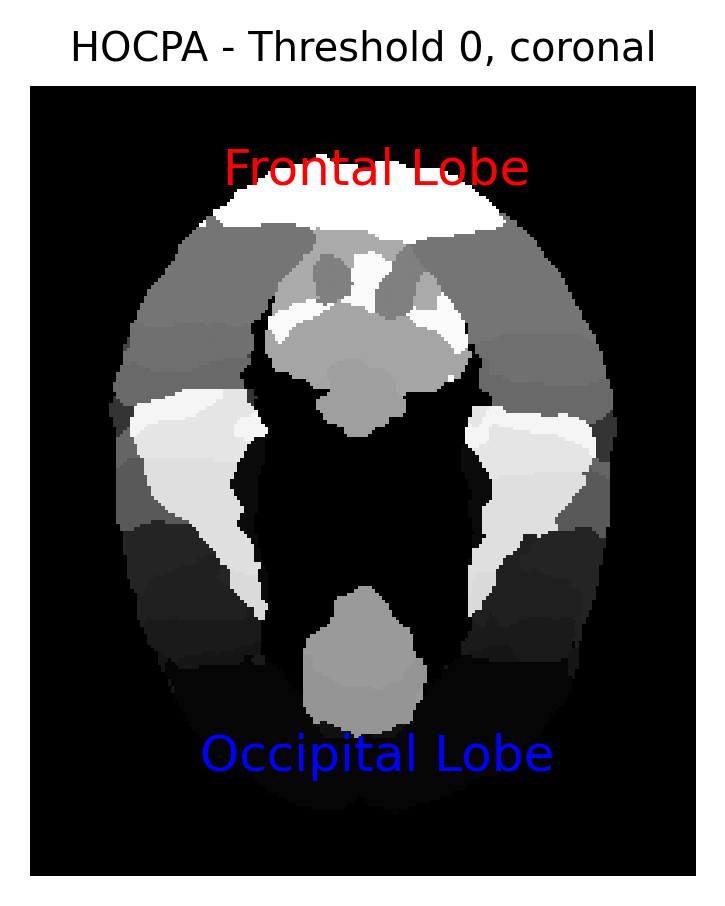

In [122]:
from ndslib.config import jupyter_startup
jupyter_startup()

import pkg_resources
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
from scipy.ndimage import zoom
# Draw a brain and highlight two major structures (one cortical and one subcortical)


from templateflow import api as tf

# Load atlas image
atlas_files = tf.get(template='MNI152NLin2009cAsym', atlas='HOCPA', desc='th0', suffix='dseg', resolution=1)
print(atlas_files)
#atlas_th50 = [f for f in atlas_files if 'desc-th50' in str(f)][0] 
atlas_img = nib.load(atlas_files)
print(atlas_img.affine)
orientation = nib.aff2axcodes(atlas_img.affine)
print("Orientation (in RAS+ format):", orientation)
atlas_data = atlas_img.get_fdata() 


# Load labels
# Apparently it's a known error that tsv file isn't here for this slice? And 
# I am getting a lot of errors when calling other atlases with issues downloading properly so I will manually label
# tsv_files = tf.get(template='MNI152NLin2009cAsym', atlas='HOCPA', suffix='dseg', extension='.tsv')

atlas_slice = atlas_data[:, :, atlas_data.shape[2] // 2 ]
rotated_slice = rotate(atlas_slice, 90)

# Visualize slice
plt.imshow(rotated_slice, cmap='gray', origin='lower')
plt.title('HOCPA - Threshold 0, coronal')

plt.text(100, 200, 'Frontal Lobe', color='red', fontsize=12, ha='center')
plt.text(100, 30, 'Occipital Lobe', color='blue', fontsize=12, ha='center')


plt.axis('off')
plt.show()


In [126]:
'''
Discuss the key preprocessing steps for MRI data discussed in the class. 
For each step, explain its function and the potential consequences of omitting 
that step on the quality and reliability of the resulting images and analyses. (1')

Pre-processing requires the removal of noise, correcting for image inhomogeneity, and skull stripping. 

MRI images may have noise as an artifact of the MRI machine, resolution of the image obtained, or head movement.
This can be corrected with the use of smoothing.
Correcting for Image Inhomogeneity is also an issue. This can be dealt with by correcting for variance. 
The increased intensity of the skull will affect the distribution in the brain matter, and the ability to parcellate. 
'''


"\nDiscuss the key preprocessing steps for MRI data discussed in the class. \nFor each step, explain its function and the potential consequences of omitting \nthat step on the quality and reliability of the resulting images and analyses. (1')\n\nPre-processing requires the removal of noise, correcting for image inhomogeneity, and skull stripping. \n\nMRI images may have noise as an artifact of the MRI machine, resolution of the image obtained, or head movement.\nThis can be corrected with the use of smoothing.\nCorrecting for Image Inhomogeneity is also an issue. This can be dealt with by correcting for variance. \nThe increased intensity of the skull will affect the distribution in the brain matter, and the ability to parcellate. \n"